In [103]:
%load_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import nn4n
from nn4n.model import CTRNN
from nn4n.structure import MultiAreaEI

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CTRNN under default settings

Linear Layer: 
   | input_dim:  1
   | output_dim: 100
   | dist:       uniform
   | use_bias:   True
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9477156400680542
   | weight_max: 0.9882354736328125
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



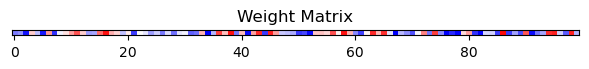

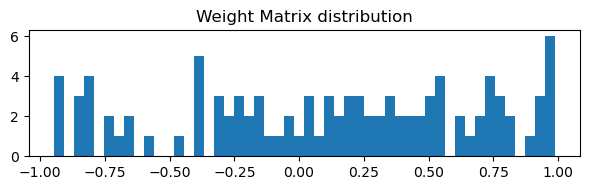

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0
   | postact_noise: 0
   | activation:    relu
   | alpha:         0.1

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 100
   | distribution:     normal
   | use_bias:         True
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.4088210165500641
   | weight_max:       0.39789777994155884
   | weight_mean:      0.0023185734171420336
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.9900000095367432
   | scaling:          1.0



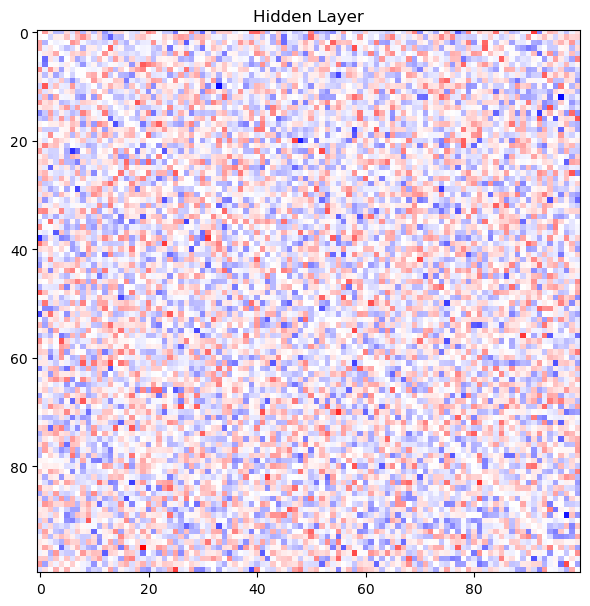

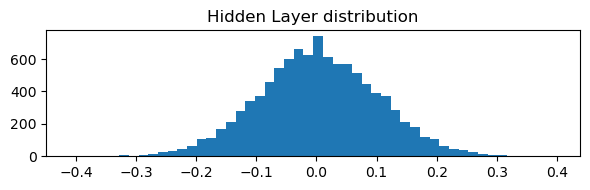

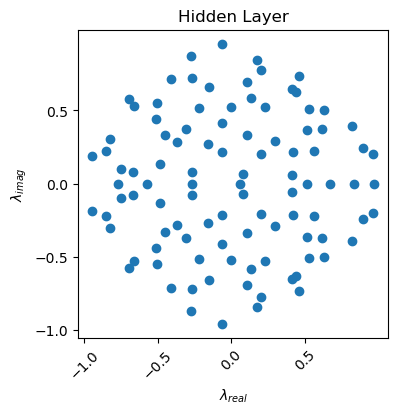

Linear Layer: 
   | input_dim:  100
   | output_dim: 1
   | dist:       uniform
   | use_bias:   True
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09844885021448135
   | weight_max: 0.09268016368150711
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



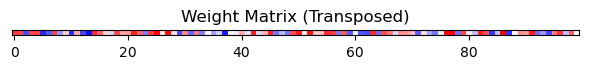

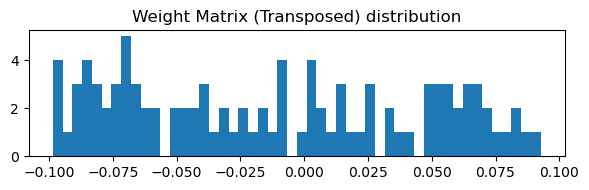

In [104]:
rnn = CTRNN()
rnn.print_layers()

## Positive value only in the hidden layer

Linear Layer: 
   | input_dim:  1
   | output_dim: 100
   | dist:       uniform
   | use_bias:   True
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9803268909454346
   | weight_max: 0.9902317523956299
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



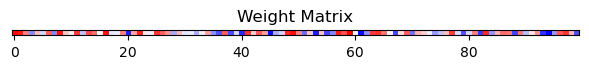

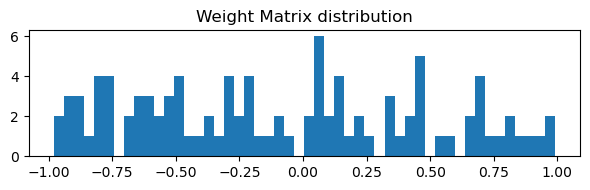

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0
   | postact_noise: 0
   | activation:    relu
   | alpha:         0.1

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 100
   | distribution:     normal
   | use_bias:         True
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       0.0
   | weight_max:       0.39115166664123535
   | weight_mean:      0.20210561156272888
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.9900000095367432
   | scaling:          1.0



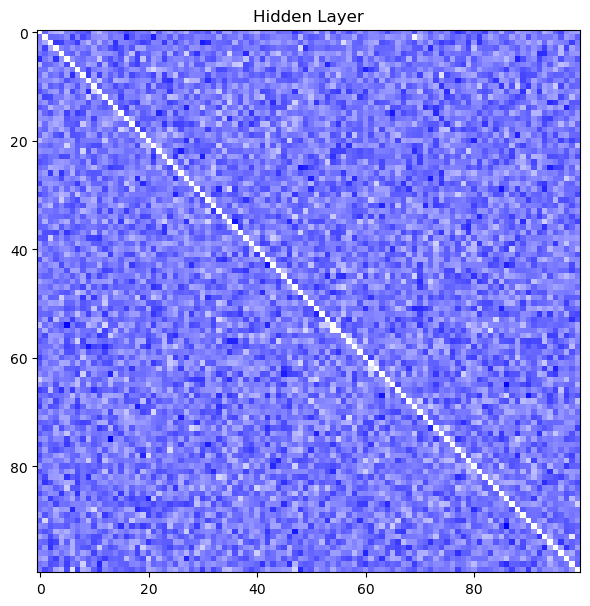

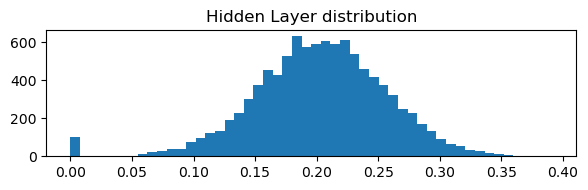

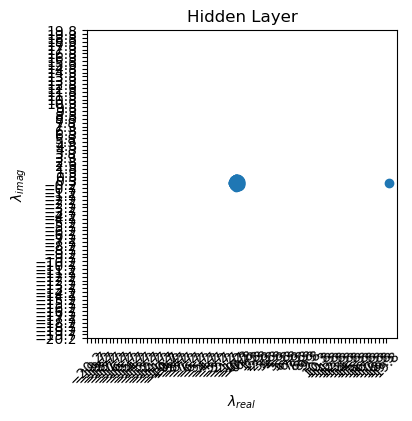

Linear Layer: 
   | input_dim:  100
   | output_dim: 1
   | dist:       uniform
   | use_bias:   True
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09900262206792831
   | weight_max: 0.09924113005399704
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   1



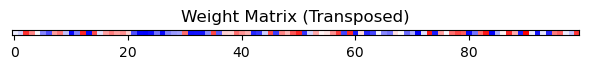

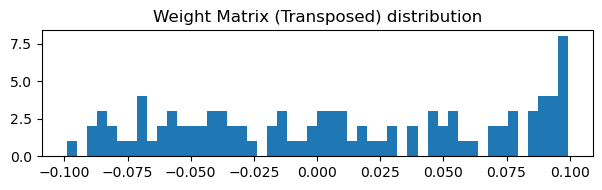

In [105]:
rnn = CTRNN(allow_negative=[True, False, True])
rnn.print_layers()

## Train on a simple sin wave prediction task

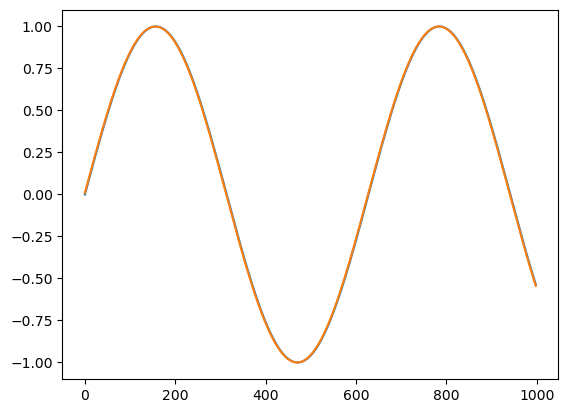

In [85]:
# predict sin wave
inputs = np.sin(np.linspace(0, 10, 1000))
inputs = torch.from_numpy(inputs).float().unsqueeze(1).unsqueeze(1)
labels = inputs[1:]
inputs = inputs[:-1]

plt.plot(inputs.squeeze(1).squeeze(1).numpy())
plt.plot(labels.squeeze(1).squeeze(1).numpy())
plt.show()

In [86]:
rnn = CTRNN(input_dim=1, hidden_size=10, output_dim=1)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

losses = []
for epoch in range(500):
    outputs, states = rnn(inputs)
    loss = torch.nn.MSELoss()(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


Epoch 0 Loss 0.5451008081436157
Epoch 50 Loss 0.28054338693618774
Epoch 100 Loss 0.054961830377578735
Epoch 150 Loss 0.012372765690088272
Epoch 200 Loss 0.004928223323076963
Epoch 250 Loss 0.00067645322997123
Epoch 300 Loss 0.00028278271201997995
Epoch 350 Loss 0.00024251120339613408
Epoch 400 Loss 0.00021348036534618586
Epoch 450 Loss 0.0001885553792817518


## Use CTRNN with a mask

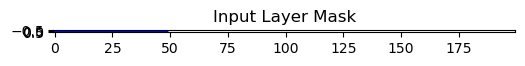

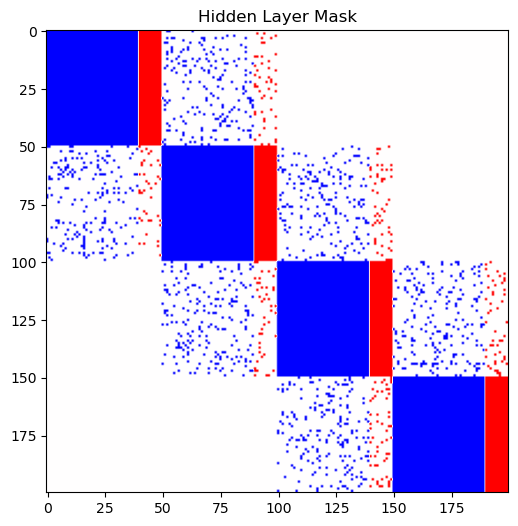

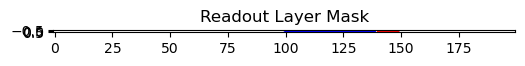

In [87]:
area_connectivities = np.array([
    [1.0, 0.1, 0.0, 0.0],
    [0.1, 1.0, 0.1, 0.0],
    [0.0, 0.1, 1.0, 0.1],
    [0.0, 0.0, 0.1, 1.0],
])

struct_params = {
    "n_areas": 4,
    "exc_pct": 0.8,
    "area_connectivities": area_connectivities,
    "input_areas": [0],
    "readout_areas": [2],
    "input_dim": 1,
    "output_dim": 1,
    "hidden_size": 200,
    "inter_area_connections": [True, True, True, True],
    "inh_output": False,
}

network_struct = MultiAreaEI(**struct_params)
network_struct.visualize()

In [100]:
model_params = {
    # size
    "input_dim": 1,
    "hidden_size": 200,
    "output_dim": 1,
    
    # hyperparameters
    "tau": 50,
    "positivity_constraintsssss": True,
    "scaling": 1.0,
    "dt": 1,
    "activation": "relu",
    "preact_noise": 0.0,
    "postact_noise": 0.0,
    "sparsity_constraints": False,
    "self_connections": False,

    # bias and distribution
    "layer_biases": [False, False, False],
    "layer_distributions": ['uniform', 'normal', 'uniform'],

    # masks
    "layer_masks": [network_struct.input_mask, network_struct.hidden_mask, network_struct.readout_mask],
}

Linear Layer: 
   | input_dim:  1
   | output_dim: 200
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([200, 1])
   | weight_min: 0.0
   | weight_max: 0.9943751692771912
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



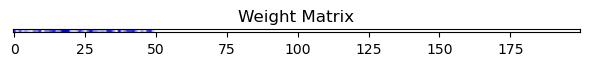

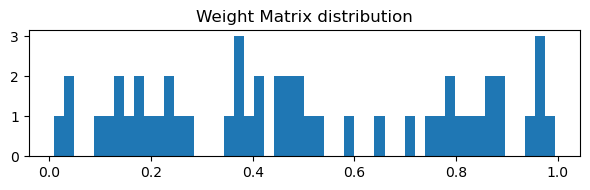

Recurrence: 
   | hidden_min:    0.0
   | hidden_max:    0.0
   | hidden_mean:   0.0
   | preact_noise:  0.0
   | postact_noise: 0.0
   | activation:    relu
   | alpha:         0.02

Hidden Layer: 
   | self_connections: False
   | input/output_dim: 200
   | distribution:     normal
   | bias:             False
   | dale:             True
   | shape:            torch.Size([200, 200])
   | weight_min:       -1.6754072904586792
   | weight_max:       0.3754640519618988
   | weight_mean:      0.0003362135903444141
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.28162500262260437
   | scaling:          1.0



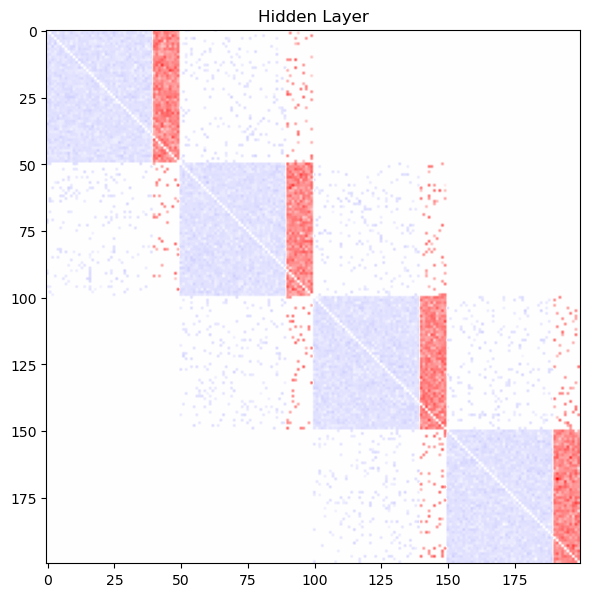

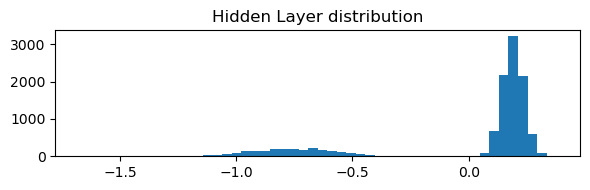

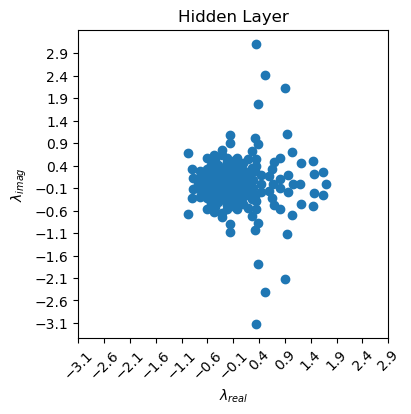

Linear Layer: 
   | input_dim:  200
   | output_dim: 1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 200])
   | weight_min: -0.2512647211551666
   | weight_max: 0.28028640151023865
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



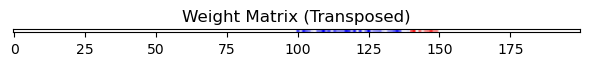

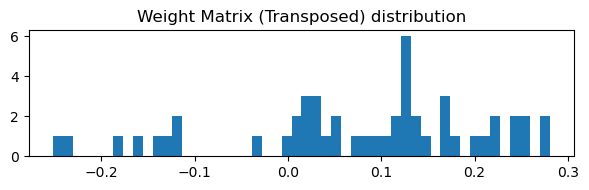

In [101]:
rnn = CTRNN(**model_params)
rnn.print_layers()